In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/onlinefraud.csv")
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [ ]:
# number of rows and columns
data.shape

(6362620, 11)

In [ ]:
# Checking whether this dataset has any null values or not

print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


NO NULL VALUES NO NEED TO DO IMPUTATION

In [ ]:
# Exploring transaction type

print(data.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [ ]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(data, values=quantity, names=transactions, hole = 0.5, title="Distribution of Transaction Type")
figure.show()

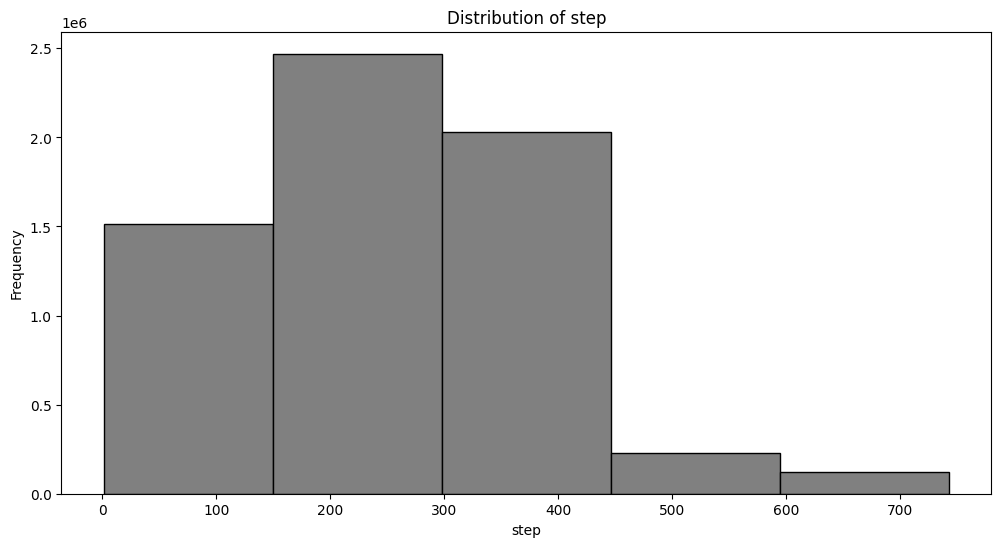

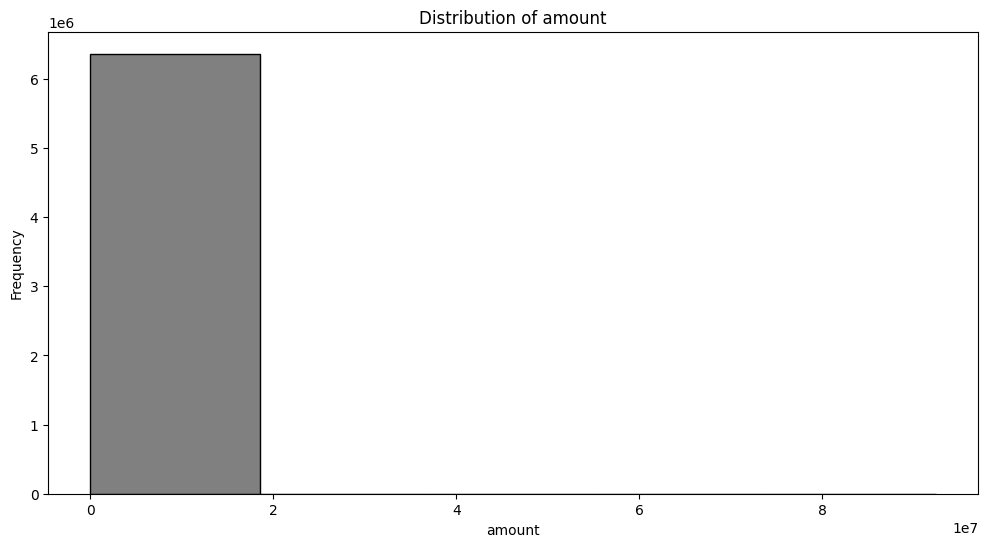

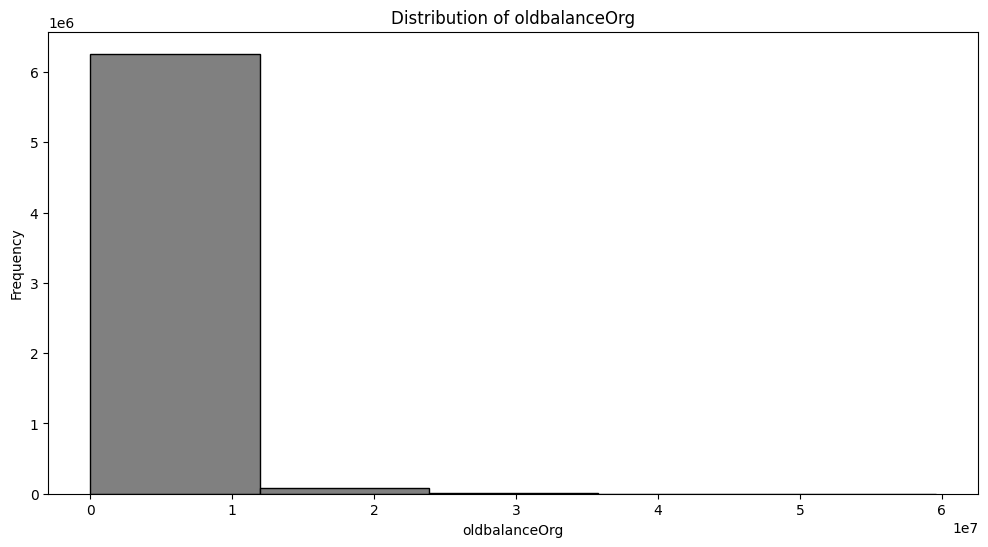

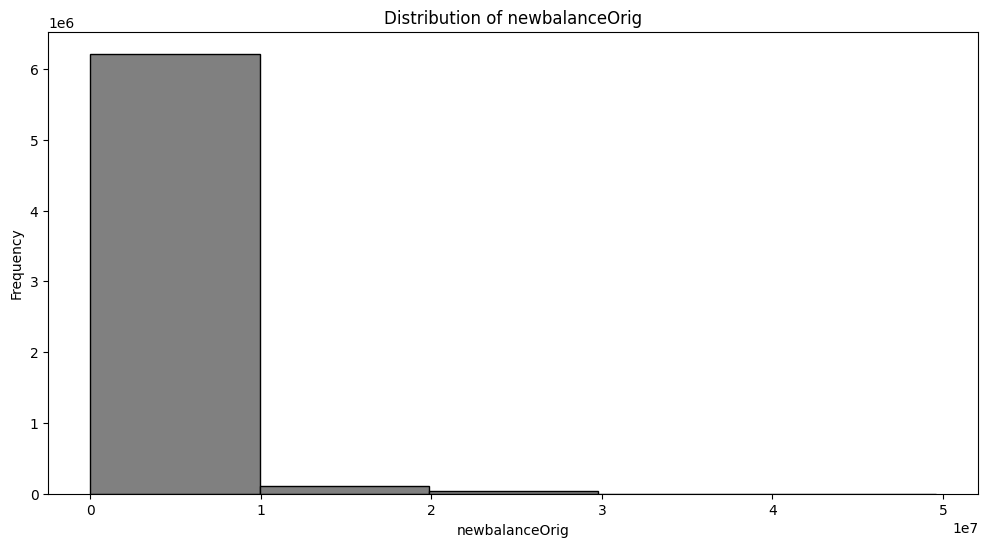

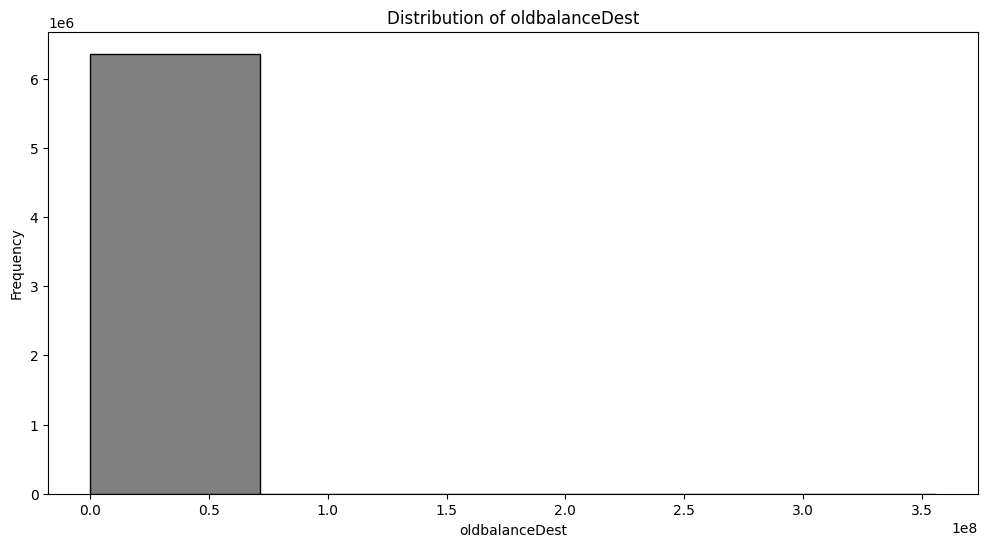

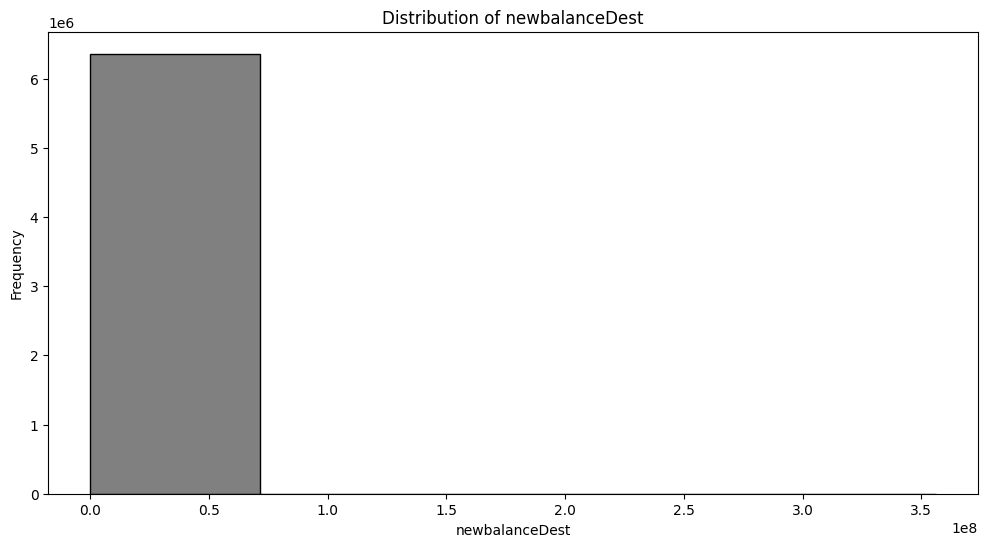

In [ ]:
#plotting histogram to check distributions of each attribute
feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.title(f"Distribution of {i}")
    plt.show()

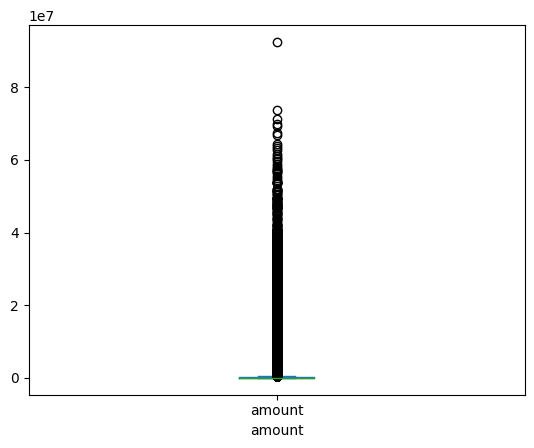

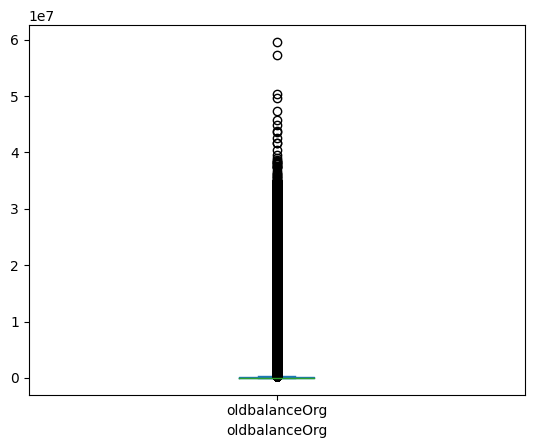

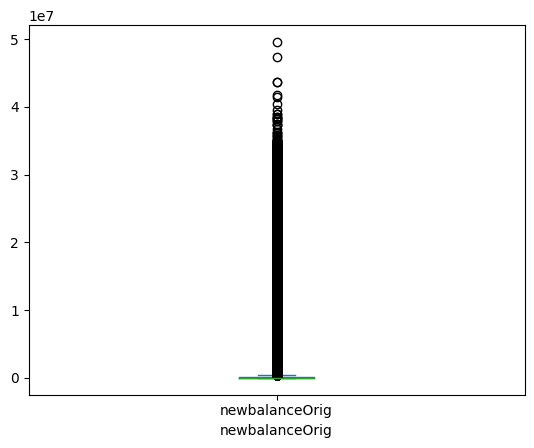

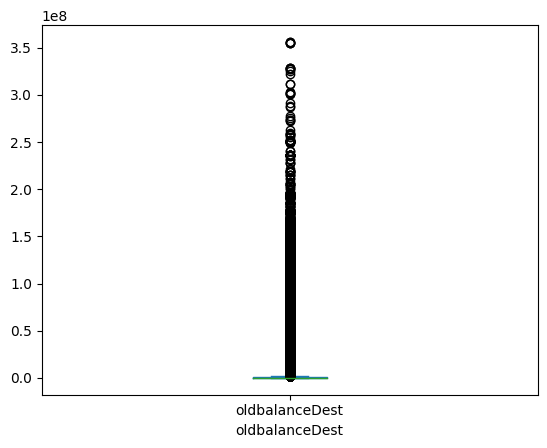

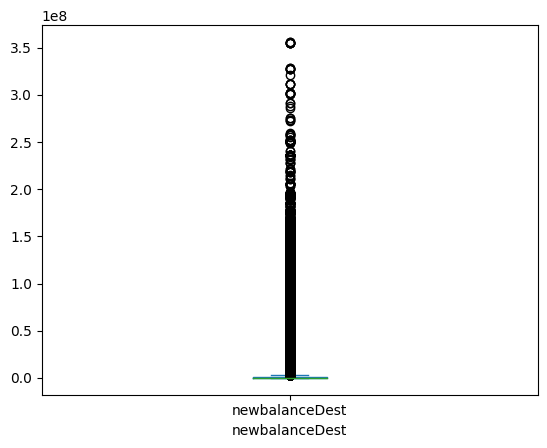

In [ ]:
#Using box plot to see data distribution as it can be seen that there are some outliers int the dataset
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    data[i].plot(kind='box')
    plt.show()

Observations
Features are highly skewed except step column, there must be outliers in data

In [ ]:
#Removing the outliers by capping the extreme values on both side
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = data[i].quantile(0.10)
    upper = data[i].quantile(0.90)
    data[i] = np.where(data[i] <lower, lower,data[i])
    data[i] = np.where(data[i] >upper, upper,data[i])
    print('Feature: ',i)
    print('Skewness value: ',data[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




Distribution after removing outliers

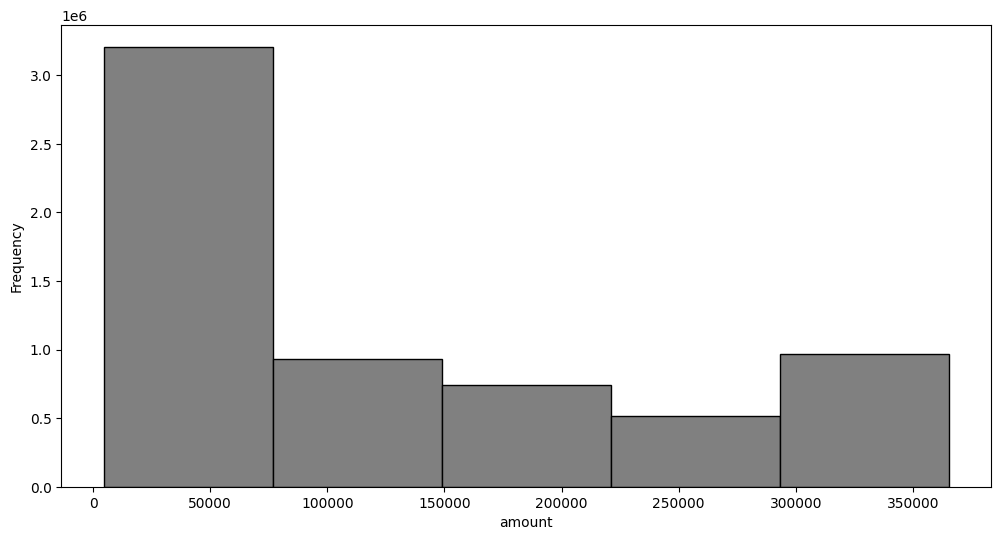

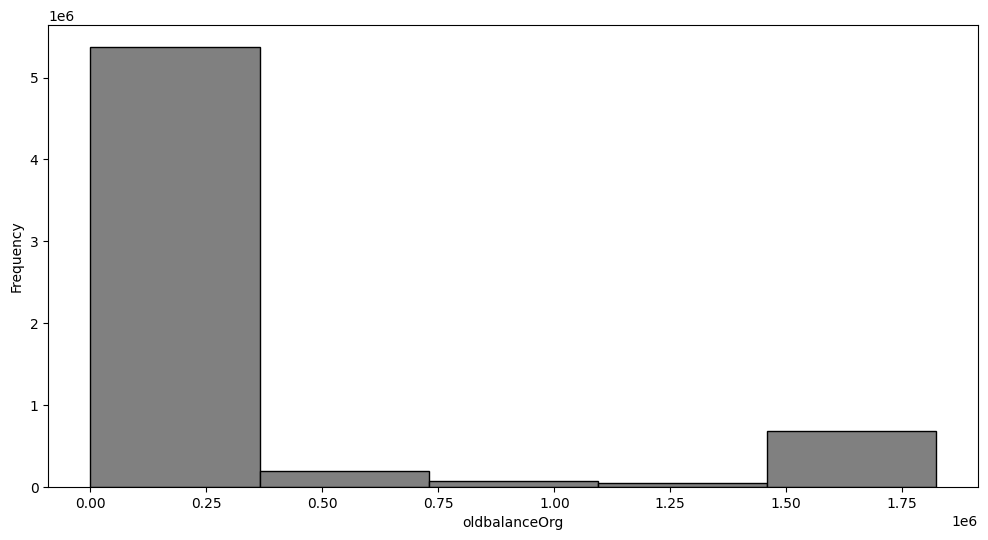

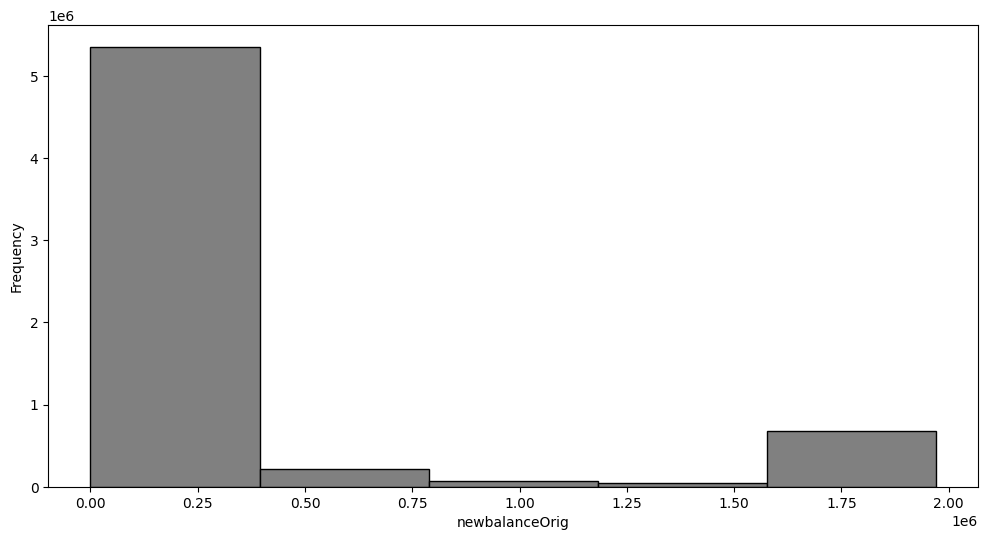

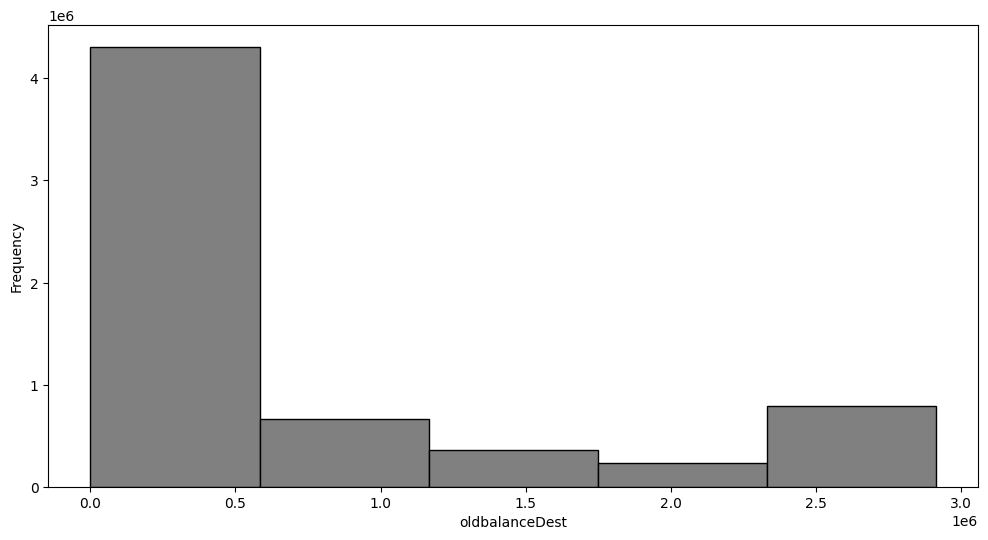

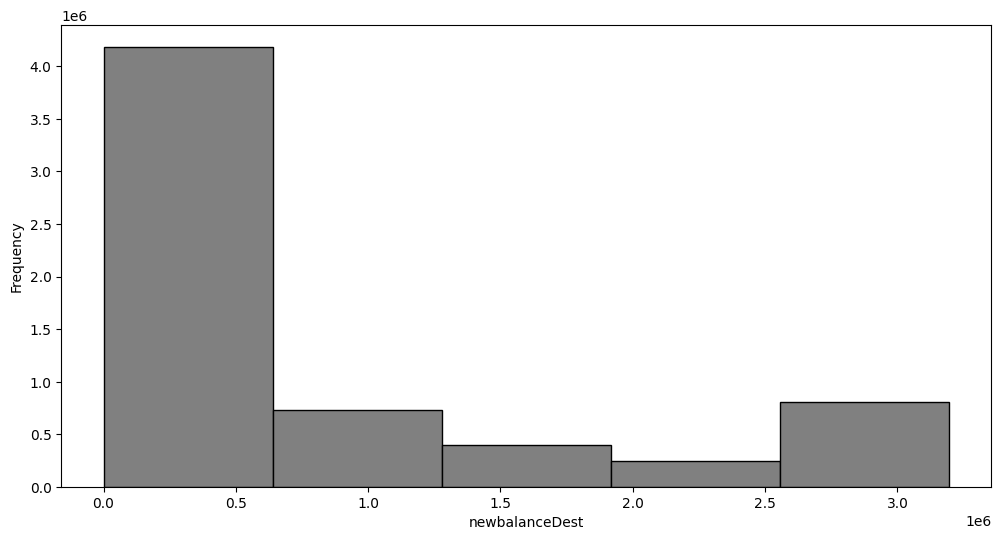

In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

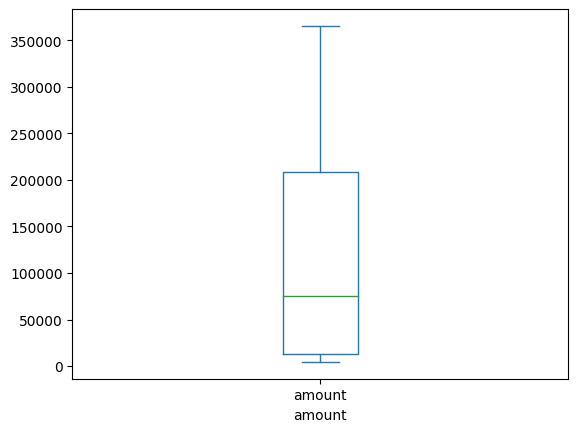

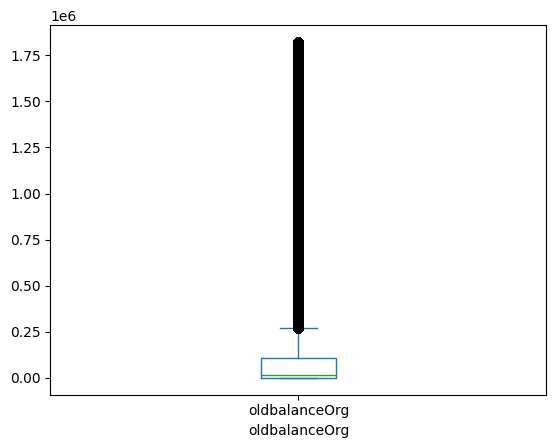

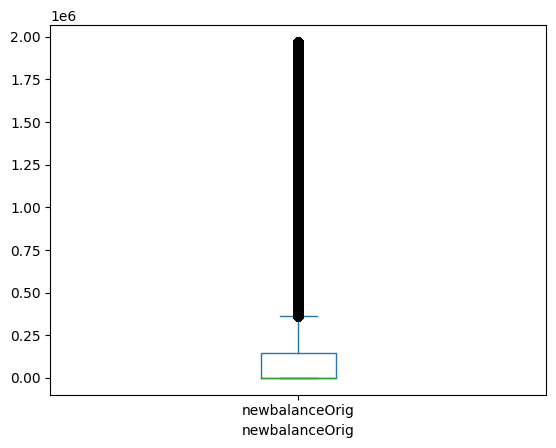

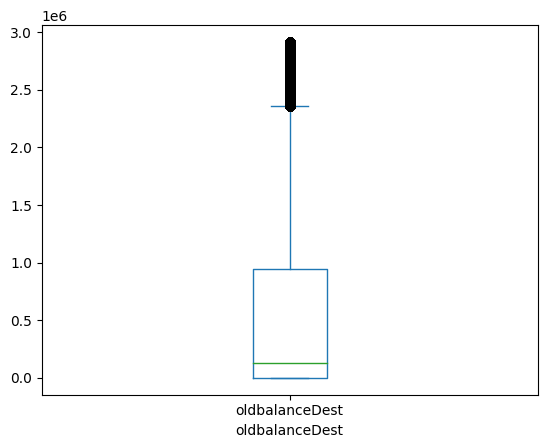

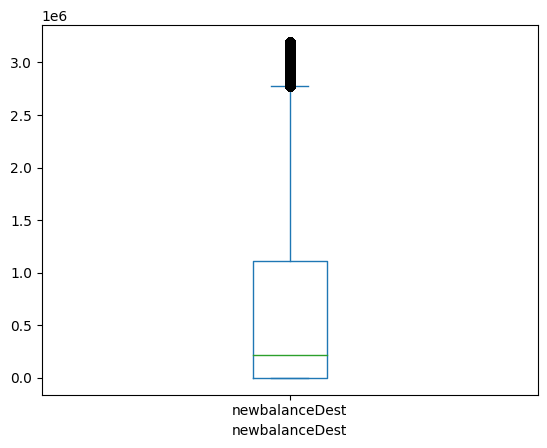

In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    data[i].plot(kind='box')
    plt.show()

In [ ]:
CrosstabResult=pd.crosstab(index=data.type,columns=data.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


(3500.0, 7000.0)

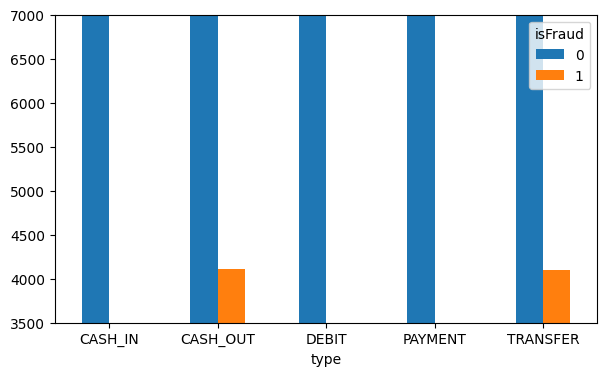

In [ ]:
# Grouped bar chart between TYPE and ISFRAUD by changing ylimit to view isFraud values
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.ylim([3500, 7000])

<ipython-input-15-f0c9897445b6>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

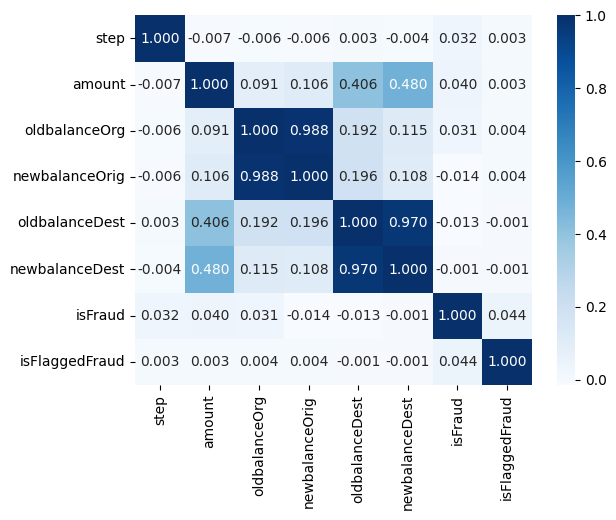

In [ ]:
# calculate correlation matrix
corr = data.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")

There is very Less correlation between isFraud,newbalanceDest and isFraud,oldbalanceDest

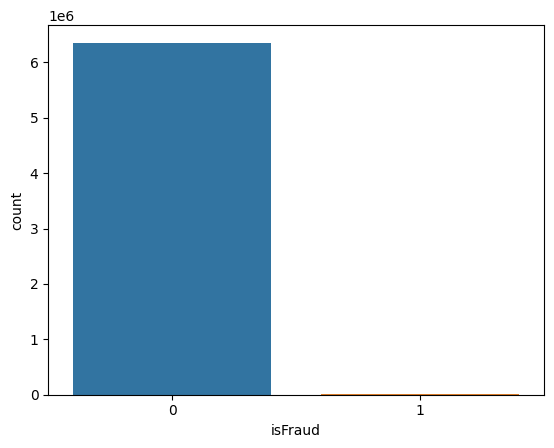

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='isFraud', data = data)

# Show the plot
plt.show()

In [ ]:
#It can be seen that the dataset is highly unbalanced as there are very few entry points where there is a fraud
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

To balance this asymmetrical dataset performing undersampling to make the distribution symetrical

0 --> legit transactions
1 --> fraudlent transactions

In [ ]:
legit = data[data.isFraud == 0]
fraud = data[data.isFraud == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(6354407, 11)
(8213, 11)


Building a sample dataset containing similar distributions of legit and fraudlent transactions

Number of Fraudlent transactions --> 8213

In [ ]:
legit_sample = legit.sample(n=8213)

In [ ]:
print(legit_sample.shape)

(8213, 11)


Concatenate the two dataframes

In [ ]:
new_data = pd.concat([legit_sample,fraud],axis = 0)

In [ ]:
new_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4764086,334,CASH_IN,284268.58,C1390716779,1822508.289,1970344.793,C815136224,2914266.669,3194869.671,0,0
257505,14,CASH_OUT,58508.88,C1405151006,63673.880,5165.000,C2144980559,150689.000,273233.040,0,0
2419527,202,PAYMENT,19124.41,C560778186,0.000,0.000,M1888566512,0.000,0.000,0,0
2867869,227,PAYMENT,25477.92,C466785130,226214.460,200736.540,M581625979,0.000,0.000,0,0
118941,11,PAYMENT,12233.09,C1002877283,0.000,0.000,M692728669,0.000,0.000,0,0


In [ ]:
new_data.isFraud.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

Feature Engineering
1st Iteration

In [ ]:
# transforming the categorical features into numerical. Also transforming the values of the isFraud column into
# No Fraud and Fraud labels to have a better understanding of the output
# Changing CASH_OUT to 1, PAYMENT to 2, CASH_IN to 3, TRANSFER to 4 and DEBIT to 5

data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   4501.30  C1666544295        21249.0        19384.72   
2     1     4   4501.30  C1305486145          181.0            0.00   
3     1     1   4501.30   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [ ]:
# splitting the data

x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [ ]:
# training a machine learning model

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9993587547268263


In [ ]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]

features = np.array([[1, 8900.2, 8990.2, 0.0]])
print(model.predict(features))

['Fraud']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

# Create a logistic regression model.
logmodel = LogisticRegression()
logmodel.fit(xtrain, ytrain)
print(logmodel.score(xtest, ytest))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.9991261461473419


In [ ]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]

features = np.array([[1, 8900.2, 8990.2, 0.0]])
print(logmodel.predict(features))

['No Fraud']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

forestmodel = RandomForestClassifier()
forestmodel.fit(xtrain, ytrain)
print(forestmodel.score(xtest, ytest))


<ipython-input-40-53190f8dbd06>:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.999396475037013
